    gender  Math_Score  Reading_Score  Writing_Score  Placement_Score  \
0   Female          70             91             65               97   
1   Female          70             94             66               96   
2     male          77             84             72               89   
3   Female          79             86             62               83   
4     male          69             95             73               89   
5     male          75             79             66               82   
6   Female          61             92             78               75   
7     male          79             90             74               78   
8     male          69             78             80               92   
9   Female          65             80             75               90   
10  Female          64             80             66               93   
11    male          63             80             79               76   
12  Female          76             94             6

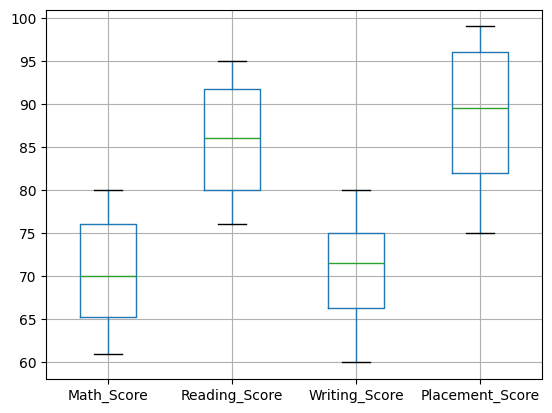

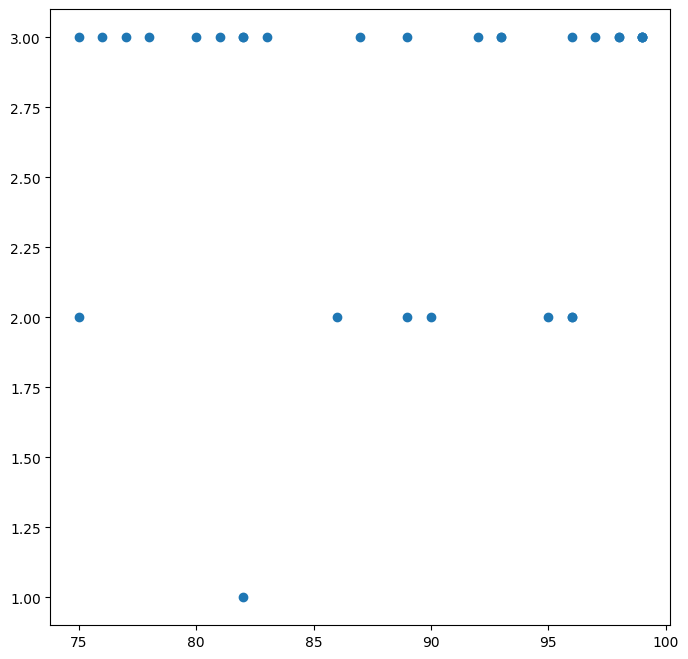

(array([ 6,  7, 11, 21, 29]),)
(array([ 1,  2,  9, 19, 22, 23]),)
0     0.180483
1     0.180483
2     1.003937
3     1.342342
4     0.349686
5     0.665531
6     1.703308
7     1.342342
8     0.349686
9     1.026497
10    1.195700
11    1.364903
12    0.834734
13    0.834734
14    1.534106
15    0.665531
16    1.173140
17    0.349686
18    1.003937
19    0.011280
20    0.180483
21    1.511545
22    1.195700
23    0.665531
24    0.665531
25    0.349686
26    1.026497
27    0.857294
28    1.364903
29    1.511545
Name: Math_Score, dtype: float64
(array([ 0,  1,  4,  8, 17, 19, 20, 25]),)
[76, 77, 78, 78, 79, 79, 80, 80, 80, 82, 83, 84, 84, 86, 86, 86, 88, 89, 90, 90, 90, 91, 92, 93, 93, 94, 94, 95, 95, 95]
80.0 91.75
62.375 109.375
[76, 77, 78, 78, 79, 79, 80, 80, 80, 82, 83, 84, 84, 86, 86, 86, 88, 89, 90, 90, 90, 91, 92, 93, 93, 94, 94, 95, 95, 95]
86.0
    gender  Math_Score  Reading_Score  Writing_Score  Placement_Score  \
0   Female          70           91.0             65          

<Axes: >

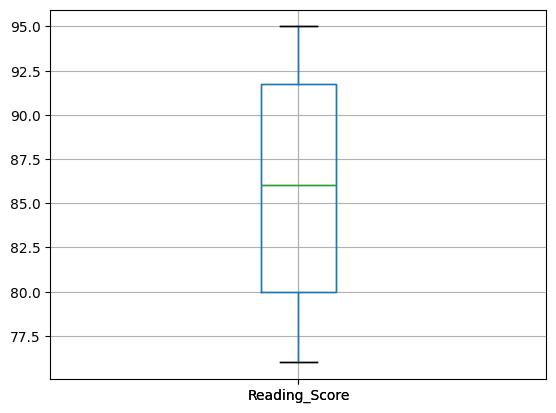

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("StudentsPerformance.csv",encoding='utf-8', na_values=["", "NULL", "Na"])
df.columns = df.columns.str.strip()
print(df)

#-------------Boxplot---------------------------------------------------------
col = ['Math_Score', 'Reading_Score' , 'Writing_Score','Placement_Score']
df.boxplot(col)
print(np.where(df['Math_Score']>70))
print(np.where(df['Reading_Score']<85))
print(np.where(df['Writing_Score']<70))
# -----------Scatter plot---------------------------
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['Placement_Score'], df['Placement_Offer_count'])
plt.show()
ax.set_xlabel('Placement_Score')
ax.set_ylabel('Placement_Offer_count')
print(np.where((df['Placement_Score']<80) & (df['Placement_Offer_count']>1)))
print(np.where((df['Placement_Score']>85) & (df['Placement_Offer_count']<3)))
# ------------------Z-score---------------------------------------------------------
z = np.abs(stats.zscore(df['Math_Score']))
print(z)
threshold = 0.35
sample_outliers = np.where(z <threshold)
print(sample_outliers)
# ------------------------Inter quantile range (IQR)-----------------------------------
sorted_rscore= sorted(df['Reading_Score'])
print(sorted_rscore)
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

r_outliers = []
for i in sorted_rscore:
  if (i>lwr_bound or i<upr_bound):
   r_outliers.append(i)
print(r_outliers)
# -------------Mean/median imputation---------------------------
col = ['Reading_Score']
df.boxplot(col)
median=np.median(sorted_rscore)
print(median)
refined_df=df
refined_df['Reading_Score'] = np.where(refined_df['Reading_Score'] >upr_bound, median,refined_df['Reading_Score'])
print(refined_df)
col = ['Reading_Score']
refined_df.boxplot(col)



In [4]:
import pandas as pd

df = pd.read_csv("IRIS.csv")
print(df.head())
print(df)

species_setosa = df[df['species'] == 'Iris-setosa']
species_versicolor = df[df['species'] == 'Iris-versicolor']
species_virginica = df[df['species'] == 'Iris-virginica']

def get_statistics(species_df):
    print("\nStatistical Details:")
    print(f"Mean:\n{species_df.mean()}")
    print(f"\nStandard Deviation:\n{species_df.std()}")
    print(f"\n25th Percentile:\n{species_df.quantile(0.25)}")
    print(f"\n50th Percentile (Median):\n{species_df.quantile(0.50)}")
    print(f"\n75th Percentile:\n{species_df.quantile(0.75)}")
    print(f"\nMax:\n{species_df.max()}")
    print(f"\nMin:\n{species_df.min()}")
    print(f"\nCount:\n{species_df.count()}")


print("Iris-setosa:")
get_statistics(species_setosa.drop(columns='species'))
# print("\nIris-versicolor:")
# get_statistics(species_versicolor.drop(columns='species'))
# print("\nIris-virginica:")
# get_statistics(species_virginica.drop(columns='species'))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virg